In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('../../data/bikes_rent.csv')

In [3]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


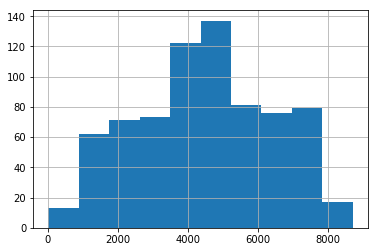

In [5]:
data['cnt'].hist();

In [7]:
X_df, y_series = data.drop('cnt', axis=1), data['cnt']

In [8]:
X_df.shape

(731, 12)

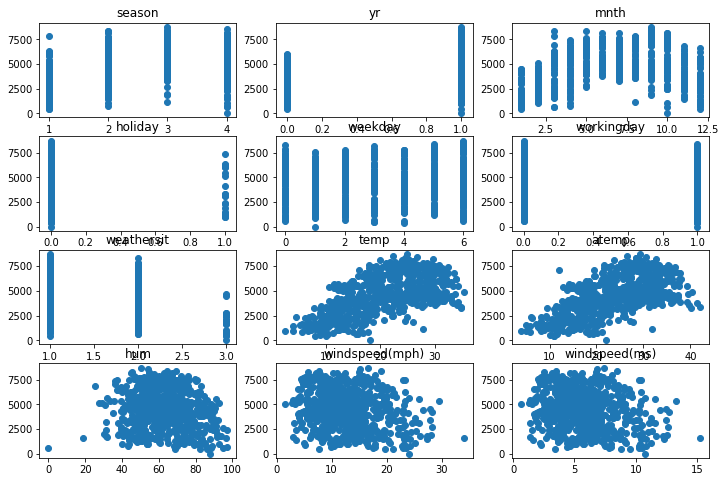

In [10]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_df.columns):
    plt.subplot(4, 3, i + 1)
    plt.scatter(X_df[col], y_series)
    plt.title(col);

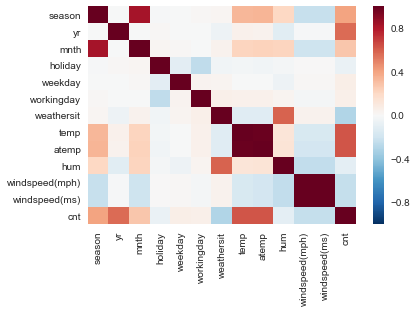

In [21]:
sns.heatmap(data.corr());

In [11]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, \
                                Ridge, RidgeCV

In [13]:
ols = LinearRegression(normalize=True)

In [16]:
train_share = 0.7

train_part_len = int(train_share * data.shape[0])

X_train  = X_df.values[:train_part_len, :]
X_valid = X_df.values[train_part_len:, :]
y_train  = y_series.values[:train_part_len]
y_valid = y_series.values[train_part_len:]

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
ols.fit(X_train, y_train)

/Users/y.kashnitsky/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [22]:
y_ols_pred = ols.predict(X_valid)

In [24]:
def rmse(y, p):
    return np.sqrt(mean_squared_error(y, p))

In [36]:
def beatiful_coef(coefs, feature_names=X_df.columns):
    return pd.DataFrame(coefs, index=feature_names,
                       columns=['coef']).sort_values('coef',
                                                  ascending=False)
    

In [25]:
rmse(y_valid, y_ols_pred)

1121.7950743410477

array([ 3.73738431e+02,  2.11192417e+03,  9.01104784e+00, -4.13960817e+02,
        5.18559845e+01,  3.17016552e+01, -5.29199981e+02,  8.53661419e+00,
        1.11378252e+02, -1.04374925e+01, -5.80681990e+11,  1.29898561e+12])

In [30]:
beatiful_coef(ols.coef_, feature_names=X_df.columns)

,coef
windspeed(ms),1.298986e+12
yr,2.111924e+03
season,3.737384e+02
atemp,1.113783e+02
weekday,5.185598e+01
workingday,3.170166e+01
mnth,9.011048e+00
temp,8.536614e+00
hum,-1.043749e+01
holiday,-4.139608e+02


In [33]:
ridge = Ridge(random_state=17, normalize=True)

In [34]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=17, solver='auto', tol=0.001)

In [38]:
beatiful_coef(ridge.coef_)

,coef
yr,893.471708
season,122.291657
workingday,44.899153
temp,43.335021
atemp,40.730731
weekday,23.657447
mnth,16.580342
hum,-6.019385
windspeed(mph),-14.569916
windspeed(ms),-32.592903


In [41]:
ridge_valid_pred = ridge.predict(X_valid)

In [42]:
rmse(y_valid, ridge_valid_pred)

1694.1963161505425

In [48]:
alphas = np.logspace(-4, 4, 100)

In [49]:
ridge_cv = RidgeCV(alphas=alphas,
                   cv=5, normalize=True).fit(X_train, y_train)

In [51]:
ridge_cv.alpha_

0.012618568830660211

In [52]:
best_ridge_valid_pred = ridge_cv.predict(X_valid)

In [53]:
rmse(y_valid, best_ridge_valid_pred)

1118.8033866081003

In [55]:
lasso = LassoCV(alphas=alphas, cv=5, normalize=True).fit(X_train, y_train)

In [56]:
lasso.alpha_

0.09770099572992257

In [58]:
best_lasso_valid_pred = lasso.predict(X_valid)

In [59]:
rmse(y_valid, best_lasso_valid_pred)

1120.7599048718084

In [60]:
beatiful_coef(lasso.coef_)

,coef
yr,2104.016880
season,371.889534
atemp,110.702588
weekday,50.803375
workingday,28.492832
temp,9.100711
mnth,8.227825
windspeed(ms),-0.000000
hum,-10.225836
windspeed(mph),-35.387183


In [61]:
beatiful_coef(ridge_cv.coef_)

,coef
yr,2086.883298
season,354.849868
atemp,70.048003
temp,52.872890
weekday,50.868024
workingday,34.406998
mnth,12.867755
hum,-10.225210
windspeed(mph),-18.579682
windspeed(ms),-41.562749


In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
forest = RandomForestRegressor(n_estimators=100, random_state=17)

In [64]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=17, verbose=0, warm_start=False)

In [65]:
forest_valid_pred = forest.predict(X_valid)

In [66]:
rmse(y_valid, forest_valid_pred)

1053.8080862607937

In [67]:
beatiful_coef(forest.feature_importances_)

,coef
temp,0.324132
atemp,0.216861
yr,0.200795
hum,0.067893
season,0.064054
weathersit,0.032349
mnth,0.028291
windspeed(ms),0.020298
weekday,0.018796
windspeed(mph),0.017695
